# 정규표현식
- 문자열을 처리할 때, 다양한 요구조건에 맞는 패턴을 만들어 처리하는 방법
- 이메일 찾기, 아이디/비밀번호 찾기, 회원가입 아이디 패턴 찾기 등

In [1]:
import re

In [5]:
# 패턴찾기
re.match('Hello', 'Hello, world!')

<re.Match object; span=(0, 5), match='Hello'>

In [6]:
re.search('Hello', 'Hello, world!')

<re.Match object; span=(0, 5), match='Hello'>

In [7]:
re.match('Hello', 'world! Hello')
# 위치가 바뀌면 패턴 찾지못함 -> 결과x

In [8]:
re.search('Hello', 'world! Hello')
# search는 전체 문자열에서 패턴을 확인

<re.Match object; span=(7, 12), match='Hello'>

- 숫자 [0-9]
- 영어소문자 [a-z]
- 영어대문자 [A-Z]
- 한글 [가-힣]
- 자음/모음 [ㄱ-ㅎ]/[ㅏ-ㅣ]
- ^not : ~제외하고 전부 다
- +, * : 0개 이상 또는 1개 이상의 패턴을 모두

In [9]:
# 숫자 패턴 찾기
re.search('[0-9]','1231243134123,asdfasdf!@3121')

<re.Match object; span=(0, 1), match='1'>

In [10]:
re.search('[가-힣]+','12345/홍길동/asdfa@naver.com/010-111-1111')

<re.Match object; span=(6, 9), match='홍길동'>

- {숫자} : 해당 패턴의 문자 개수 설정

In [11]:
# 휴대전화번호 패턴 찾기
re.match('[0-9]{3}-[0-9]{4}-[0-9]{4}','010-1234-5678')

<re.Match object; span=(0, 13), match='010-1234-5678'>

In [12]:
# 정규표현식 합쳐서 사용 가능
re.search('[가-힣a-zA-Z0-9]+/[가-힣a-zA-Z0-9]+','12345/홍길동/asdfa@naver.com/010-111-1111')

<re.Match object; span=(0, 9), match='12345/홍길동'>

- \d 모든 숫자
- \D 모든 숫자 제외
- \w 영문, 대소문자, 숫자, 밑줄 문자 포함
- \W 영문, 대소문자, 숫자, 밑줄 문자 제외한 나머지

In [14]:
re.search('\d+','1231243134123,asdfasdf!@3121')

<re.Match object; span=(0, 13), match='1231243134123'>

## 정규표현식 그룹으로 사용 가능

In [15]:
ab = re.match('([0-9]+) ([a-z]+)','1234 abc')
# ab : 두 그룹으로 설정

In [16]:
ab.group(1)

'1234'

In [17]:
ab.group(2)

'abc'

In [18]:
ab.group(0)

'1234 abc'

## 실제 데이터를 활용한 정규표현식 및 텍스트 분석

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('movie_rv.csv')
df

,Unnamed: 0,id,document,label
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,2,10265843,너무재밓었다그래서보는것을추천한다,0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,149996,8549745,평점이 너무 낮아서...,1
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [3]:
# stirp() : 공백제거 lstrip, rstrip 
df['document'].str.strip()

0                                       아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지.. 소는 뭔죄인가..
149996                                        평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

- pad : 길이 맞출 떄
df['document'].str.pad(width=30, side='left', fillchar='*')

In [4]:
df['document'].str.center(width=30, fillchar='/')
# 가운데정렬
# 공백 / 으로 채우기

0                            /////아 더빙.. 진짜 짜증나네요 목소리//////
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                            //////너무재밓었다그래서보는것을추천한다///////
3                            교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정/
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                       /////인간이 문제지.. 소는 뭔죄인가..//////
149996                       ////////평점이 너무 낮아서.../////////
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                       /청춘 영화의 최고봉.방황과 우울했던 날들의 자화상//
149999                       ///한국 영화 최초로 수간하는 내용이 담긴 영화///
Name: document, Length: 150000, dtype: object

In [5]:
df['document'].str.ljust(width=30, fillchar='/') 
# 오른쪽정렬

0                            아 더빙.. 진짜 짜증나네요 목소리///////////
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                            너무재밓었다그래서보는것을추천한다/////////////
3                            교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정/
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                       인간이 문제지.. 소는 뭔죄인가..///////////
149996                       평점이 너무 낮아서.../////////////////
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                       청춘 영화의 최고봉.방황과 우울했던 날들의 자화상///
149999                       한국 영화 최초로 수간하는 내용이 담긴 영화//////
Name: document, Length: 150000, dtype: object

In [6]:
df['document'].str.zfill(width=30)
# zfill : 공백 0으로 채우기

0                            00000000000아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                            0000000000000너무재밓었다그래서보는것을추천한다
3                            0교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                       00000000000인간이 문제지.. 소는 뭔죄인가..
149996                       00000000000000000평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                       000청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                       000000한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

## split() : 문자열 나누기
- expand = True : 여러 칼럼으로 나누기
- expand = False : 1개의 칼럼으로 나누기
- n : 구분자 개수

In [7]:
df[['document_1','document_2']]=df['document'].str.split(' ', n=1, expand=True )

## partition() : 좌측에 먼저 있던 구분자를 나누기

In [8]:
df[['document_1n','document_2n','document_3n']]=df['document'].str.partition(sep=' ')

In [9]:
df

,Unnamed: 0,id,document,label,document_1,document_2,document_1n,document_2n,document_3n
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,아,더빙.. 진짜 짜증나네요 목소리,아,,더빙.. 진짜 짜증나네요 목소리
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠...포스터보고,초딩영화줄....오버연기조차 가볍지 않구나,흠...포스터보고,,초딩영화줄....오버연기조차 가볍지 않구나
2,2,10265843,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다,None,너무재밓었다그래서보는것을추천한다,,
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소,이야기구먼 ..솔직히 재미는 없다..평점 조정,교도소,,이야기구먼 ..솔직히 재미는 없다..평점 조정
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이몬페그의,익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무...,사이몬페그의,,익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무...
...,...,...,...,...,...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,인간이,문제지.. 소는 뭔죄인가..,인간이,,문제지.. 소는 뭔죄인가..
149996,149996,8549745,평점이 너무 낮아서...,1,평점이,너무 낮아서...,평점이,,너무 낮아서...
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,이게,뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,이게,,뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,청춘,영화의 최고봉.방황과 우울했던 날들의 자화상,청춘,,영화의 최고봉.방황과 우울했던 날들의 자화상


## 영문 대소문자 바꾸기
- lower : 소문자로 변경
- upper : 대문자로 변경
- capitalize : 앞문자만 대문자로 변경
- title : 단위별 앞문자를 대문자로 변경
- swapcase : 소문자는 대문자, 대문자는 소문자로 변경

## replace

In [10]:
# ,를 *로 변경
df['document'].str.replace(pat='.', repl='*', regex=False)

0                                       아 더빙** 진짜 짜증나네요 목소리
1                         흠***포스터보고 초딩영화줄****오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 **솔직히 재미는 없다**평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지** 소는 뭔죄인가**
149996                                        평점이 너무 낮아서***
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉*방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

## find
- 해당 문자가 어디에 있는지 인덱스를 반환 하는 것
- -1 : 없는 값

In [11]:
df['document_non']= df['document'].str.find(sub='.')

In [12]:
df['findall_docu']=df['document'].str.findall(pat='[재미]')

In [13]:
df['findall_num']=df['document'].str.findall(pat='[0-9]+')

## slice
- 특정 인덱스의 값을 잘라낸 후 반환
## slice_replace
- 특정 인덱스의 값을 잘라낸 후 다른 값으로 반환

In [14]:
df['document'].str.slice_replace(start=0, stop=4, repl='!')
# 전체 데이터의 앞 네글자 잘라낸 후 삭제한 후 !으로 대체

0                                          !.. 진짜 짜증나네요 목소리
1                            !포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                            !었다그래서보는것을추천한다
3                                !이야기구먼 ..솔직히 재미는 없다..평점 조정
4         !그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트...
                                ...                        
149995                                     !문제지.. 소는 뭔죄인가..
149996                                           !너무 낮아서...
149997                         !요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                             !화의 최고봉.방황과 우울했던 날들의 자화상
149999                                !화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

In [18]:
# 전체 데이터의 앞 다섯글자 삭제
df['document'].str.slice(start=0, stop=5)

0         아 더빙.
1         흠...포
2         너무재밓었
3         교도소 이
4         사이몬페그
          ...  
149995    인간이 문
149996    평점이 너
149997    이게 뭐요
149998    청춘 영화
149999    한국 영화
Name: document, Length: 150000, dtype: object

## len()

In [17]:
df['document'].str.len()
# 전체 리뷰의 대한 길이

0         19.0
1         33.0
2         17.0
3         29.0
4         61.0
          ... 
149995    19.0
149996    13.0
149997    31.0
149998    27.0
149999    24.0
Name: document, Length: 150000, dtype: float64

In [19]:
import matplotlib.pyplot as plt

(array([36766., 46098., 33551., 12015.,  6098.,  3990.,  3136.,  2231.,
         2361.,  3749.]),
 array([  1. ,  15.5,  30. ,  44.5,  59. ,  73.5,  88. , 102.5, 117. ,
        131.5, 146. ]),
 <BarContainer object of 10 artists>)

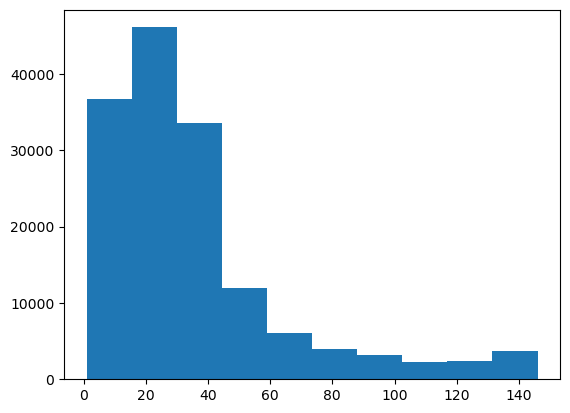

In [20]:
plt.hist(df['document_len'])
# 전체 리뷰의 길이에 대한 분포

In [21]:
df['label'].value_counts()
# 긍부정 컬럼 

label
0    75173
1    74827
Name: count, dtype: int64